In [1]:
#Importing library and neccessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import scipy.stats as ss
from scipy.optimize import curve_fit


In [2]:
def line_plot(df):
    """
    Create a line plot
    """
    #creating figure, dpi is the resolution
    plt.figure(dpi=144)
    
    #Plot data to create line graph 
    plt.plot(df.index,df['Life expectancy'], color='orange', linestyle='-', marker = 'o')
    #Add labels and title
    plt.xlabel('Year') # label of x-axis
    plt.ylabel('Life expectancy(years)') #label of y-axis
    plt.title('Life expectancy over the years') #sets the plot title
    #display the plot
    plt.show()
   
    return


In [3]:
def plot_unemployment(df):
    """
    Create a bar graph 
    """
    #creating figure, dpi is the resolution
    plt.figure(figsize=(10, 6))
    #Plot data 
    plt.bar(df.index,df['Unemployment'], color='blue')
    plt.xlabel('Year') # label of x-axis
    plt.ylabel('Unemployment rate (%)') # label of y-axis
    plt.title('Unemployment rate in Japan') #title
    plt.xticks(rotation=45, ha='center')  # Rotate x-axis labels for better readability

    plt.show()
    return
    

In [4]:
def plot_heatmap(df_1, method):
    """
    Generate a heatmap to visualize the correlation 
    """
    fig, ax = plt.subplots(dpi=144)
    # Mask is used here to prevent the repetition of value
    mask = np.triu(np.ones_like(df_1.corr()))
    sns.heatmap(df_1.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    # Function to show plot heatmap
    plt.show()
    return

In [5]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_
    return score, inertia

In [6]:
def Plot_Elbow_Method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', 
               color='red', facecolors='none', s=50)
    ax.set_title('Elbow score')
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

In [7]:
def Cluster_Plot(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    #Plot the data with different colors for clusters
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap,marker='o', label='Data')
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap,marker='x', s=100, label='Estimated Centres')
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.set_title('Cluster plot for Exports vs Unemployment')
    ax.legend()
    ax.set_xlabel('Exports (% of GDP)')
    ax.set_ylabel('Unemployment(% of labor force)')
    plt.show()
    return

In [8]:
def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    """
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [9]:
#Extracting data from excel file
df= pd.read_excel("Japan economy.xlsx")
#Setting index
df.set_index('Year', inplace=True)
df.rename(columns={'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment',
                   'Inflation, consumer prices (annual %)' : 'Inflation',
                   'GDP (current US$)': 'GDP',
                   'Imports of goods and services (% of GDP)' : 'Imports', 
                   'Exports of goods and services (% of GDP)' :'Exports',
                  'Life expectancy at birth, total (years)' : 'Life expectancy' }, inplace=True)
df


,Country Name,GDP,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports,Exports,"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)",Unemployment,Inflation,"Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),Life expectancy
Year,,,,,,,,,,,,,,,
1991,Japan,3.584420e+12,2.636747e+12,28915.008205,3.523357,8.287870,9.786921,38.854051,8.062586e+10,2.10,3.251438,0.014176,123964000,0.392820,79.100732
1992,Japan,3.908809e+12,2.719707e+12,31414.984637,0.900586,7.637725,9.693352,39.630684,7.969668e+10,2.20,1.760283,0.014889,124425000,0.371192,79.153902
1993,Japan,4.454144e+12,2.769754e+12,35681.963942,-0.459220,6.936003,9.079612,42.898821,1.079890e+11,2.50,1.243046,0.017434,124829000,0.324168,79.293659
1994,Japan,4.998798e+12,2.856993e+12,39933.515056,1.083383,6.970479,8.839827,55.014943,1.351456e+11,2.90,0.695458,0.017487,125178000,0.279192,79.687073
1995,Japan,5.545564e+12,2.993645e+12,44197.619101,2.631000,7.573635,8.816470,60.661831,1.926197e+11,3.20,-0.127899,0.020755,125472000,0.234590,79.536341
1996,Japan,4.923392e+12,3.143992e+12,39150.039631,3.133871,8.938123,9.315745,65.287984,2.255940e+11,3.40,0.136600,0.010159,125757000,0.226885,80.200244
1997,Japan,4.492449e+12,3.229589e+12,35638.231956,0.981229,9.399822,10.383696,72.860059,2.266791e+11,3.40,1.747805,0.013687,126057000,0.238271,80.424146
1998,Japan,4.098363e+12,3.224451e+12,32423.755613,-1.270330,8.629380,10.373806,80.263110,2.224433e+11,4.10,0.661974,0.013512,126400000,0.271730,80.501463
1999,Japan,4.635982e+12,3.258972e+12,36610.168316,-0.333930,8.320092,9.805539,90.529776,2.939482e+11,4.70,-0.341297,0.012219,126631000,0.182586,80.570732


In [10]:
# defining a new dataframe for skewness, kurtosis,correlation and heatmap
df_1= df[[ 'GDP', 'Inflation','Imports', 'Exports','Unemployment', 'Life expectancy', 'Population, total']]

In [11]:
# Display the first five rows of dataframe 
(df.head())

,Country Name,GDP,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports,Exports,"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)",Unemployment,Inflation,"Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),Life expectancy
Year,,,,,,,,,,,,,,,
1991,Japan,3.584420e+12,2.636747e+12,28915.008205,3.523357,8.287870,9.786921,38.854051,8.062586e+10,2.1,3.251438,0.014176,123964000,0.392820,79.100732
1992,Japan,3.908809e+12,2.719707e+12,31414.984637,0.900586,7.637725,9.693352,39.630684,7.969668e+10,2.2,1.760283,0.014889,124425000,0.371192,79.153902
1993,Japan,4.454144e+12,2.769754e+12,35681.963942,-0.459220,6.936003,9.079612,42.898821,1.079890e+11,2.5,1.243046,0.017434,124829000,0.324168,79.293659
1994,Japan,4.998798e+12,2.856993e+12,39933.515056,1.083383,6.970479,8.839827,55.014943,1.351456e+11,2.9,0.695458,0.017487,125178000,0.279192,79.687073
1995,Japan,5.545564e+12,2.993645e+12,44197.619101,2.631000,7.573635,8.816470,60.661831,1.926197e+11,3.2,-0.127899,0.020755,125472000,0.234590,79.536341


In [12]:
# Display the last five rows of dataframe 
(df.tail())

,Country Name,GDP,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports,Exports,"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)",Unemployment,Inflation,"Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),Life expectancy
Year,,,,,,,,,,,,,,,
2016,Japan,5.003678e+12,5.158900e+12,39375.473162,0.753827,15.252278,16.057969,193.393931,1.216519e+12,3.1,-0.127259,0.076553,127076000,-0.051137,83.984878
2017,Japan,4.930837e+12,5.262255e+12,38834.052934,1.675332,16.831774,17.591439,NaN,1.264141e+12,2.8,0.484200,0.090107,126972000,-0.081874,84.099756
2018,Japan,5.037835e+12,5.340832e+12,39727.116600,0.584068,18.306046,18.326018,NaN,1.270467e+12,2.4,0.989095,0.086733,126811000,-0.126880,84.210976
2019,Japan,5.123318e+12,5.354366e+12,40458.001876,-0.240351,17.734442,17.445378,NaN,1.322443e+12,2.4,0.468776,0.085662,126633000,-0.140465,84.356341
2020,Japan,5.040108e+12,5.315621e+12,39918.167558,-4.506905,15.800157,15.558554,NaN,1.390809e+12,2.8,-0.024996,0.096978,126261000,-0.294195,84.615610


In [13]:
# summary statistics of the data 
df.describe()

,GDP,"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports,Exports,"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)",Unemployment,Inflation,"Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),Life expectancy
count,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,26.000000,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000
mean,4.864806e+12,4.084560e+12,38344.580546,0.749033,12.598310,13.262898,118.552601,7.669202e+11,3.791667,0.370348,0.037137,1.268171e+08,0.074294,81.969984
std,5.963744e+11,9.120911e+11,4559.912739,2.056982,4.120139,3.291366,51.698582,4.765171e+11,0.997687,1.041348,0.027805,1.133944e+06,0.188310,1.698482
min,3.584420e+12,2.636747e+12,28915.008205,-5.693236,6.936003,8.816470,38.854051,7.969668e+10,2.100000,-1.352837,0.010159,1.239640e+08,-0.294195,79.100732
25%,4.499227e+12,3.236935e+12,35649.164952,0.028348,8.978312,10.151051,74.710822,2.434963e+11,2.950000,-0.268477,0.016216,1.262958e+08,-0.100062,80.518780
50%,4.910193e+12,4.203035e+12,38654.724090,1.032306,12.192330,13.301080,124.904533,8.711086e+11,3.945000,0.098320,0.027752,1.271085e+08,0.055899,82.176098
75%,5.090036e+12,4.966097e+12,39929.678182,1.771759,15.992142,15.989516,159.758160,1.253785e+12,4.662500,0.770324,0.044135,1.277502e+08,0.234074,83.272988
max,6.272363e+12,5.354366e+12,49145.280431,4.097918,20.012779,18.326018,194.823099,1.390809e+12,5.390000,3.251438,0.096978,1.280700e+08,0.392820,84.615610


In [14]:
#skewness and kurtosis of the data

print('Skewness of the data', end='\n')
print(df_1.skew() , end='\n\n')

print('Kurtosis of the data', end='\n')
print(df_1.kurtosis() , end='\n\n')

Skewness of the data
GDP                  0.418269
Inflation            1.052212
Imports              0.171989
Exports              0.071711
Unemployment        -0.110304
Life expectancy     -0.225089
Population, total   -1.019937
dtype: float64

Kurtosis of the data
GDP                  0.885301
Inflation            1.257992
Imports             -1.483979
Exports             -1.629139
Unemployment        -1.206475
Life expectancy     -1.107515
Population, total    0.288032
dtype: float64



In [15]:
# To find the correlation of each column in a DataFrame.
df_1.corr()

,GDP,Inflation,Imports,Exports,Unemployment,Life expectancy,"Population, total"
GDP,1.000000,-0.424106,0.421740,0.344248,0.234467,0.446890,0.467257
Inflation,-0.424106,1.000000,0.080111,0.052952,-0.683253,-0.226939,-0.557982
Imports,0.421740,0.080111,1.000000,0.967555,-0.082556,0.908821,0.567662
Exports,0.344248,0.052952,0.967555,1.000000,-0.096344,0.904106,0.590464
Unemployment,0.234467,-0.683253,-0.082556,-0.096344,1.000000,0.078801,0.724547
Life expectancy,0.446890,-0.226939,0.908821,0.904106,0.078801,1.000000,0.666977
"Population, total",0.467257,-0.557982,0.567662,0.590464,0.724547,0.666977,1.000000


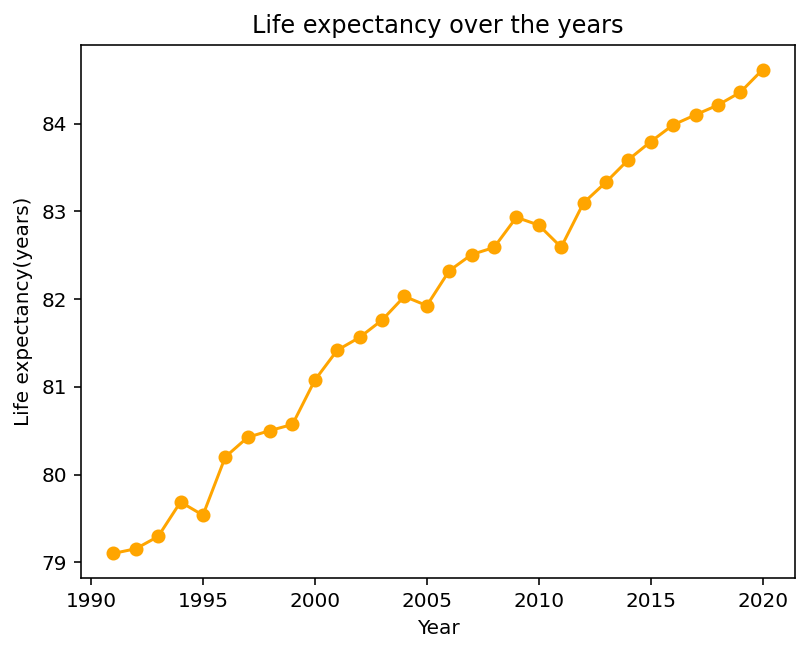

In [16]:
#plotting line graph
line_plot(df)

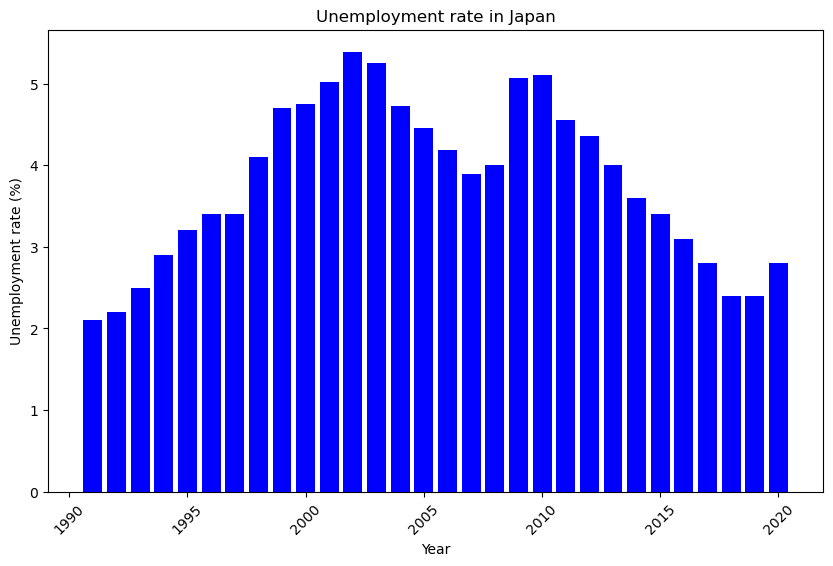

In [17]:
# plotting bar graph
plot_unemployment(df)

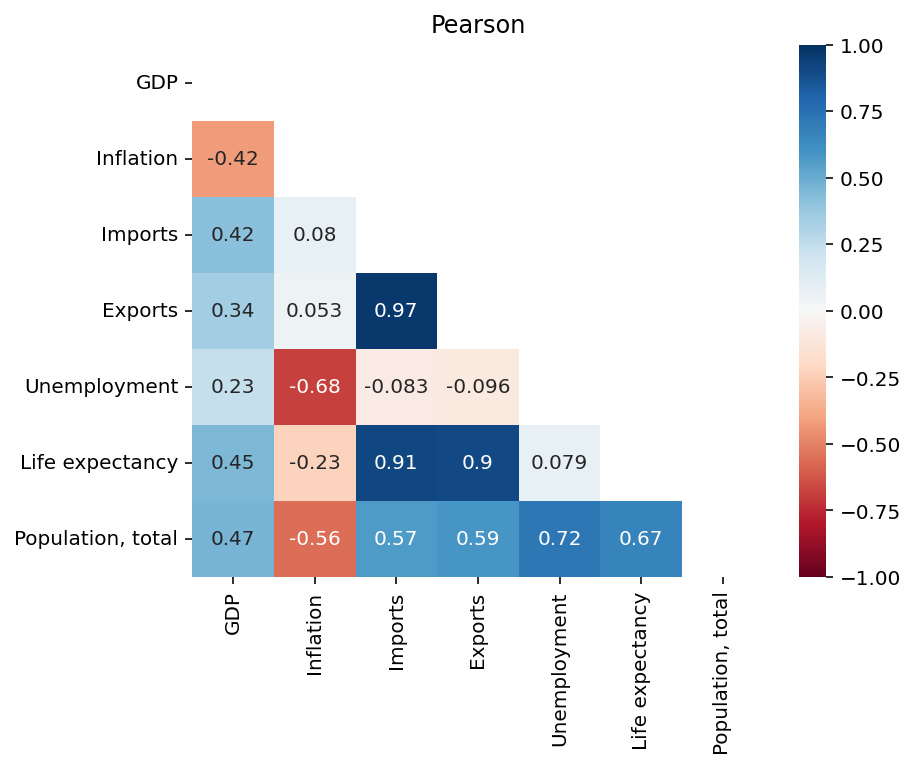

In [18]:
# Plotting Statistical graph, Heatmap
plot_heatmap(df_1,'pearson')

In [19]:
#Clustering for the exports and unemployment 
df_clust = df[['Exports', 'Unemployment']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

In [20]:
#creating a list of colors
colours = plt.cm.Set1(np.linspace(0, 1, 5))
cmap = ListedColormap(colours)

#finding the best number of Clusters using silhoutte method
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 2 clusters silhoutte score = 0.40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 3 clusters silhoutte score = 0.54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhoutte score = 0.51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 5 clusters silhoutte score = 0.48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhoutte score = 0.46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 7 clusters silhoutte score = 0.45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhoutte score = 0.46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 9 clusters silhoutte score = 0.44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters silhoutte score = 0.43
Best number of clusters =  3


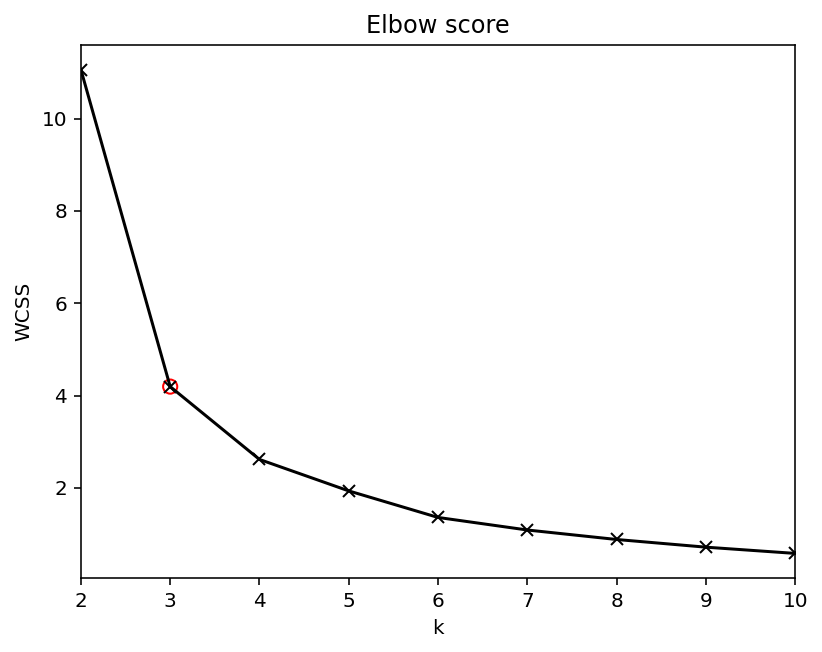

In [21]:
#for finding the best number of Clusters using elbow method
Plot_Elbow_Method(2, 10, wcss, best_n)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


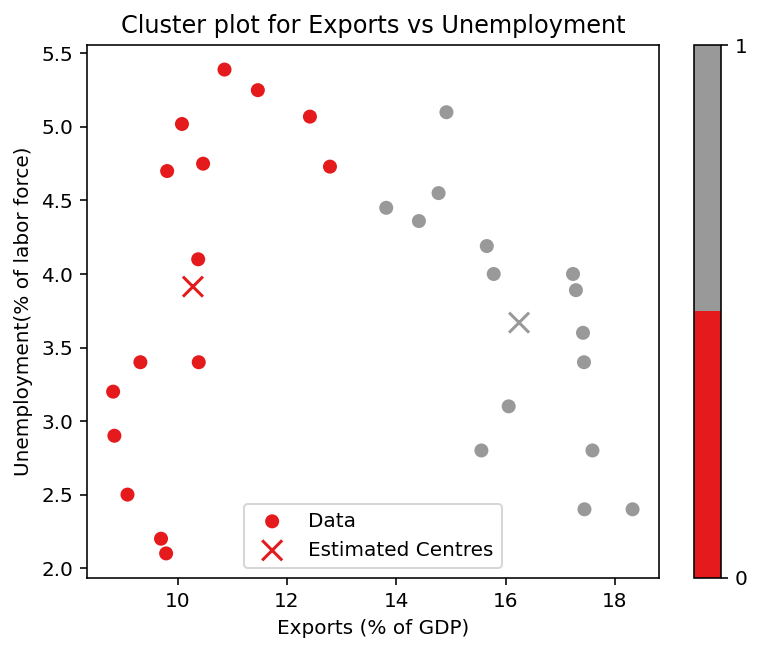

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


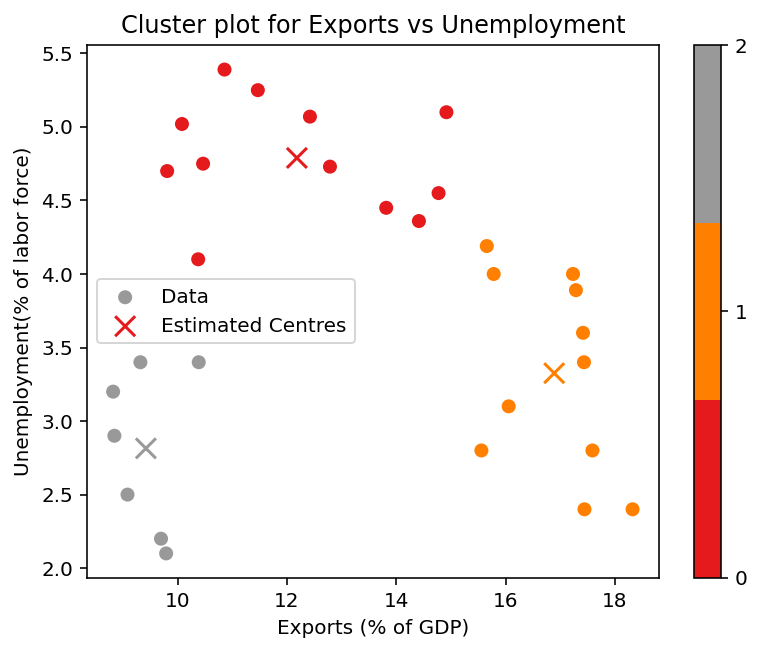

In [22]:
#making Cluster plot 
inv_norm = scaler.inverse_transform(norm)  
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    # Plotting clusters
    Cluster_Plot(labels,inv_norm, xkmeans, ykmeans, cenlabels)

In [23]:
#Fitting 
# recalling a new dataframe with parse dates from the same dataset
df_japan = pd.read_excel('Japan economy.xlsx', index_col='Year', parse_dates=['Year'])

N0 = 90.4039 +/- 1.77265
g = 0.03 +/- 0.00
t0 = 1914.68 +/- 8.86


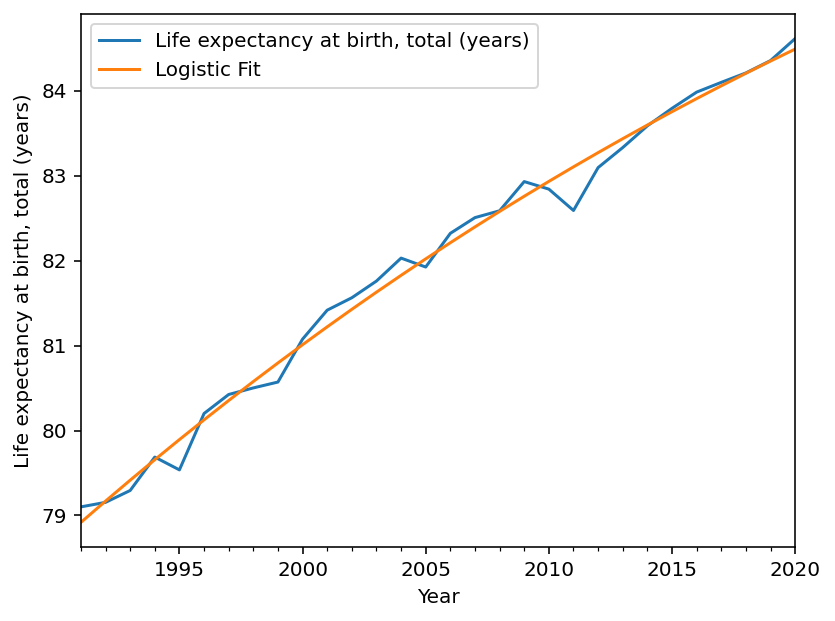

In [24]:
#  normalise the time frame
numeric_index = (df_japan.index.year - 1990).values
# give some initial guesses of N0 and growth
p, cov = curve_fit(logistic, numeric_index, df_japan['Life expectancy at birth, total (years)'],
                  p0=(1.2e12, 0.03, 10))

#to get uncertainties on each parameter
sigma = np.sqrt(np.diag(cov))

print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
print(f"g = {p[1]:.2f} +/- {sigma[1]:.2f}")
print(f"t0 = {p[2] + 1990:.2f} +/- {sigma[2]:.2f}")

#Fitted line along the life expectancy
fig, ax = plt.subplots(dpi=144)
df_japan['Logistic Fit'] = logistic(numeric_index, *p)
df_japan.plot(y=['Life expectancy at birth, total (years)', 'Logistic Fit'], ax=ax, ylabel='Life expectancy at birth, total (years)')
plt.show()

Life exepectancy in 2050: 87.5326
life expectancy in 2050: 87.5326 +/- 0.742328


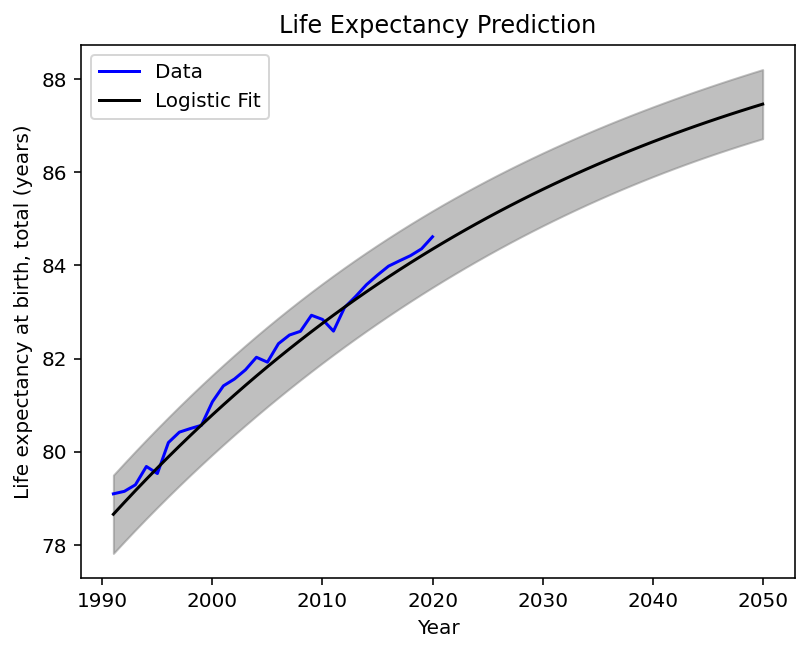

In [25]:
#Extrapolating into the future
#  normalise the time frame
numeric_index = (df_japan.index.year - 1990).values
# give some initial guesses of N0 and growth
p, cov = curve_fit(logistic, numeric_index, df_japan['Life expectancy at birth, total (years)'],
                  p0=(1.2e12, 0.03, 10))

life_2050 = logistic(2050 - 1990, *p)
print(f"Life exepectancy in 2050: {life_2050:g}")

#Finding uncertainities
# take 1000 normal random samples for each parameter
sample_params = ss.multivariate_normal.rvs(mean=p, cov=cov, size=1000)

# standard deviation of all possible parameter sampling
life_unc_2050 = np.std(logistic(2050 - 1990, *sample_params.T))  # note the transpose

print(f"life expectancy in 2050: {life_2050:g} +/- {life_unc_2050:g}")

fig, ax = plt.subplots(dpi=144)
time_predictions = np.arange(1991, 2051, 1)
life_expectancy_predictions = logistic(time_predictions - 1991, *p)
# determine uncertainty at each prediction
life_expectancy_uncertainties = [np.std(logistic(future_time - 1991, *sample_params.T)) for future_time in time_predictions]

ax.plot(df_japan.index.year, df_japan['Life expectancy at birth, total (years)'], 'b-', label='Data')
ax.plot(time_predictions, life_expectancy_predictions, 'k-', label='Logistic Fit')
ax.fill_between(time_predictions, life_expectancy_predictions - life_expectancy_uncertainties, life_expectancy_predictions + life_expectancy_uncertainties,
                color='gray', alpha=0.5)
ax.set_title('Life Expectancy Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy at birth, total (years)')
ax.legend()
plt.show()
